# 1. Data Cleaning: Handling Missing Values, Outliers

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load dataset
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
# how many rows and columns
dataset.shape

(1190, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
dataset.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [7]:
dataset.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [8]:
def univariate(dataset):
    Qual=[]
    Quan=[]
    for columnName in dataset:
        #print(columnName)
        if(dataset[columnName].dtypes =='O'):
            #print('Qual')
            Qual.append(columnName)
        else:
            #print('Quan')
            Quan.append(columnName)
    return Qual,Quan

In [9]:
Qual,Quan = univariate(dataset)

In [10]:
Qual

[]

In [11]:
Quan

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

In [12]:
dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [13]:
# Step 1: Select specific columns for outlier detection
Quan_S = [
    'age',
    'resting bp s',
    'cholesterol',
    'max heart rate',
    'oldpeak'
]


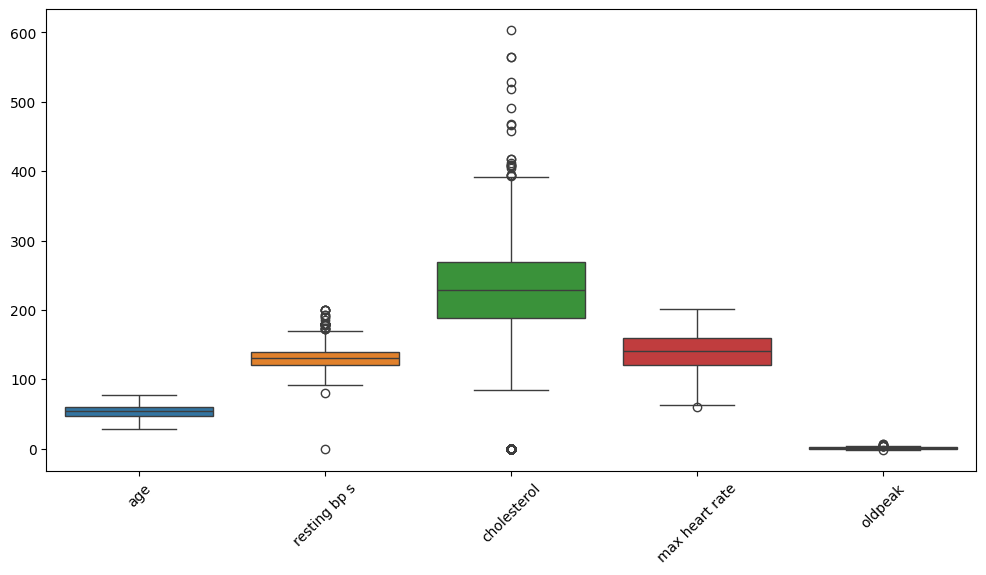

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=dataset[Quan_S])
plt.xticks(rotation=45)
plt.show()


In [15]:
def central_tendency_IQR(dataset, Quan_S):

    descriptive = pd.DataFrame(
        index=[
            'Mean', 'Median', 'Mode',
            'Q1:25%', 'Q2:50%', 'Q3:75%', 'Q4:100%',
            'IQR', 'Lesser IQR', 'Greater IQR',
            'min', 'max', 'kurtosis', 'skew', 'var', 'std'
        ],
        columns=Quan_S
    )

    for columnName in Quan_S:
        descriptive.loc['Mean', columnName] = dataset[columnName].mean()
        descriptive.loc['Median', columnName] = dataset[columnName].median()
        descriptive.loc['Mode', columnName] = dataset[columnName].mode()[0]

        Q1 = dataset[columnName].quantile(0.25)
        Q2 = dataset[columnName].quantile(0.50)
        Q3 = dataset[columnName].quantile(0.75)
        IQR = Q3 - Q1

        descriptive.loc['Q1:25%', columnName] = Q1
        descriptive.loc['Q2:50%', columnName] = Q2
        descriptive.loc['Q3:75%', columnName] = Q3
        descriptive.loc['Q4:100%', columnName] = dataset[columnName].max()

        descriptive.loc['IQR', columnName] = IQR
        descriptive.loc['Lesser IQR', columnName] = Q1 - 1.5 * IQR
        descriptive.loc['Greater IQR', columnName] = Q3 + 1.5 * IQR

        descriptive.loc['min', columnName] = dataset[columnName].min()
        descriptive.loc['max', columnName] = dataset[columnName].max()
        descriptive.loc['kurtosis', columnName] = dataset[columnName].kurtosis()
        descriptive.loc['skew', columnName] = dataset[columnName].skew()
        descriptive.loc['var', columnName] = dataset[columnName].var()
        descriptive.loc['std', columnName] = dataset[columnName].std()

    return descriptive


In [16]:
descriptive = central_tendency_IQR(dataset, Quan_S)

In [17]:
descriptive

,age,resting bp s,cholesterol,max heart rate,oldpeak
Mean,53.720168,132.153782,210.363866,139.732773,0.922773
Median,54.0,130.0,229.0,140.5,0.6
Mode,54,120,0,150,0.0
Q1:25%,47.0,120.0,188.0,121.0,0.0
Q2:50%,54.0,130.0,229.0,140.5,0.6
Q3:75%,60.0,140.0,269.75,160.0,1.6
Q4:100%,77,200,603,202,6.2
IQR,13.0,20.0,81.75,39.0,1.6
Lesser IQR,27.5,90.0,65.375,62.5,-2.4
Greater IQR,79.5,170.0,392.375,218.5,4.0


In [24]:
def check_outliers(dataset, descriptive, Quan_S):

    lesser = []
    greater = []

    for columnName in Quan_S:
        # Lower bound check
        if descriptive.loc['Lesser IQR', columnName] > descriptive.loc['min', columnName]:
            lesser.append(columnName)

        # Upper bound check
        if descriptive.loc['Greater IQR', columnName] < descriptive.loc['max', columnName]:
            greater.append(columnName)

    return lesser, greater


In [25]:
descriptive = central_tendency_IQR(dataset, Quan_S)

lesser, greater = check_outliers(dataset, descriptive, Quan_S)

print("Lower bound outliers:", lesser)
print("Upper bound outliers:", greater)


Lower bound outliers: ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
Upper bound outliers: ['resting bp s', 'cholesterol', 'oldpeak']


In [26]:
check_outliers(dataset, descriptive, Quan_S)

(['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak'],
 ['resting bp s', 'cholesterol', 'oldpeak'])

In [27]:
lesser,greater = check_outliers(dataset,descriptive, Quan_S)

In [28]:
lesser

['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [29]:
greater

['resting bp s', 'cholesterol', 'oldpeak']

In [30]:
def replace_outliers_IQR(dataset, descriptive, Quan_S):

    dataset_out = dataset.copy()

    for columnName in Quan_S:
        lower_bound = descriptive.loc['Lesser IQR', columnName]
        upper_bound = descriptive.loc['Greater IQR', columnName]

        dataset_out[columnName] = np.where(
            dataset_out[columnName] < lower_bound,
            lower_bound,
            np.where(
                dataset_out[columnName] > upper_bound,
                upper_bound,
                dataset_out[columnName]
            )
        )

    return dataset_out


In [31]:
dataset_capped = replace_outliers_IQR(dataset, descriptive, Quan_S)


In [32]:
descriptive_after = central_tendency_IQR(dataset_capped, Quan_S)


In [33]:
lesser_after, greater_after = check_outliers(
    dataset_capped,
    descriptive_after,
    Quan_S
)

print("Lower bound outliers after capping:", lesser_after)
print("Upper bound outliers after capping:", greater_after)


Lower bound outliers after capping: []
Upper bound outliers after capping: []


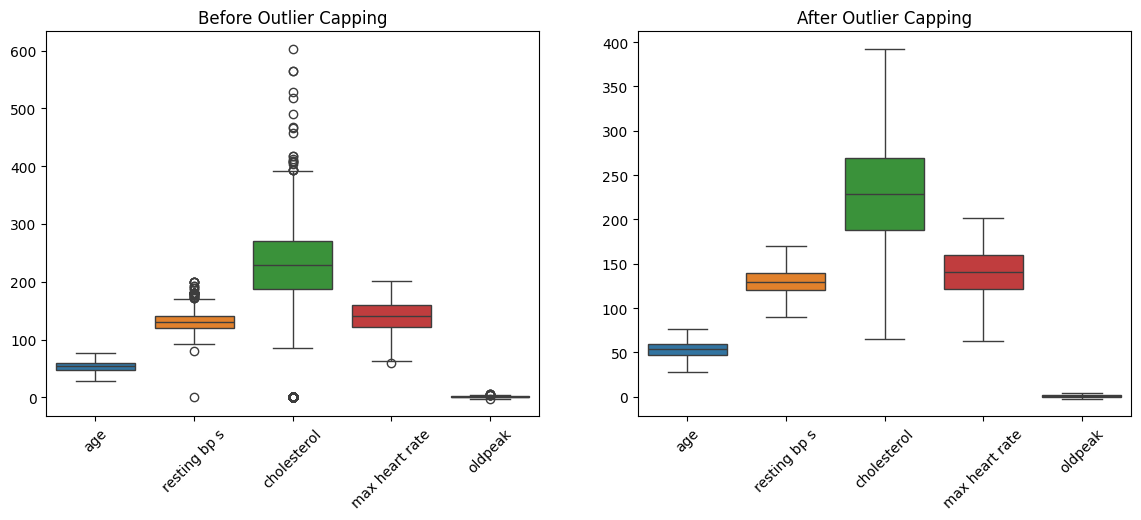

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(data=dataset[Quan_S])
plt.title("Before Outlier Capping")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=dataset_capped[Quan_S])
plt.title("After Outlier Capping")
plt.xticks(rotation=45)

plt.show()


In [35]:
dataset_capped.to_csv("heart_disease_outlier_handled.csv", index=False)
